In [1]:
import hdf5_getters
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'test_dataset.h5'

In [3]:
h5 = hdf5_getters.open_h5_file_read(path)

tempo = hdf5_getters.get_tempo(h5)

h5.close()

In [4]:
def get_stat_filtered_by_years(basedir, stat,ext='.h5') :
    titles = {"tape": [], "vinyl": [], "kassette": [], "cd": [], "mp3": []}
    for root, dirs, files in os.walk(basedir):
        files = glob.glob(os.path.join(root,'*'+ext))
        for f in files:
            try:
                h5 = hdf5_getters.open_h5_file_read(f)
                
                year = hdf5_getters.get_year(h5)
                
                if year < 1926:
                    continue
                elif year < 1947:
                    titles["tape"].append(stat(h5))
                elif year < 1967:
                    titles["vinyl"].append(stat(h5))
                elif year < 1981:
                    titles["kassette"].append(stat(h5))
                elif year < 1989:
                    titles["cd"].append(stat(h5))
                else: 
                    titles["mp3"].append(stat(h5))
                
                h5.close()
                
            except:
                pass
    return titles

In [5]:
tempo = get_stat_filtered_by_years("MillionSongSubset", hdf5_getters.get_tempo)

In [6]:
def showViolinPlot(data):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bpm = ax.violinplot(data, showmeans=True, showmedians=True)
    plt.show()

In [7]:
def showHistogram(data):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bpm = ax.hist(data, bins=int(max(data)-min(data)))
    plt.show()

# General

In [41]:
# Min and Max BPM songs

min_bpm = 250
min_pos = 0
min_list = ''
max_bpm = 100
max_pos = 0
max_list = ''

for coll in tempo:
    bpm_list = list(filter(lambda x: x > 0, tempo[coll]))
    
    if (min(bpm_list) < min_bpm):
        min_pos = tempo[coll].index(min(bpm_list))
        min_coll = coll
        min_bpm = tempo[coll][min_pos]
    
    if (max(bpm_list) > max_bpm):
        max_pos = tempo[coll].index(max(bpm_list))
        max_coll = coll
        max_bpm = tempo[coll][max_pos]
    
    
print(min_bpm, min_pos, min_coll)
print(max_bpm, max_pos, max_coll)

30.827 1473 mp3
258.677 201 mp3


# Tape

In [8]:
pd.DataFrame(tempo["tape"]).describe()

,0
count,12.000000
mean,101.429167
std,28.320264
min,38.443000
25%,96.737000
50%,100.562000
75%,107.280000
max,158.767000


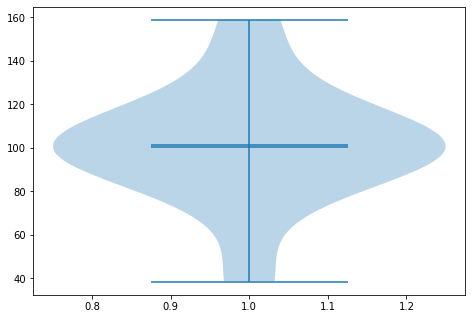

In [9]:
showViolinPlot(tempo["tape"])

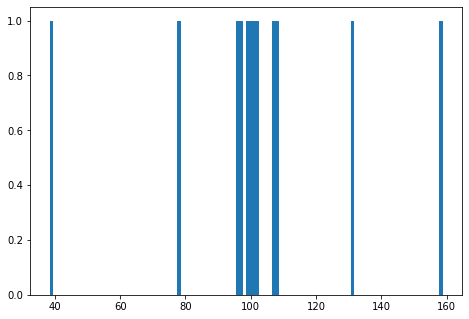

In [10]:
showHistogram(tempo["tape"])

In [11]:
# Vinyl

In [12]:
pd.DataFrame(tempo["vinyl"]).describe()

,0
count,62.000000
mean,114.560226
std,30.954589
min,59.983000
25%,95.295250
50%,108.712000
75%,129.865250
max,196.303000


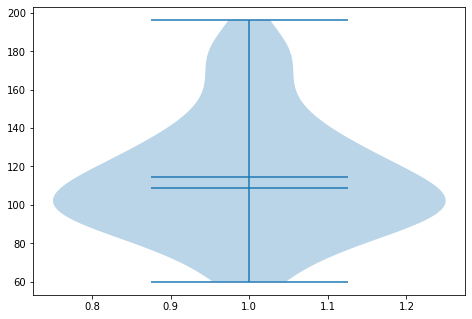

In [13]:
showViolinPlot(tempo["vinyl"])

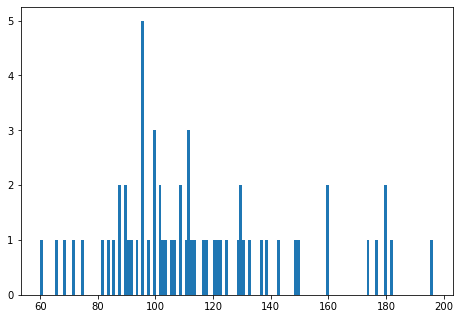

In [14]:
showHistogram(tempo["vinyl"])

In [15]:
# Kassette

In [16]:
pd.DataFrame(tempo["kassette"]).describe()

,0
count,260.000000
mean,128.454600
std,33.731867
min,41.945000
25%,104.816250
50%,123.966000
75%,151.897000
max,237.466000


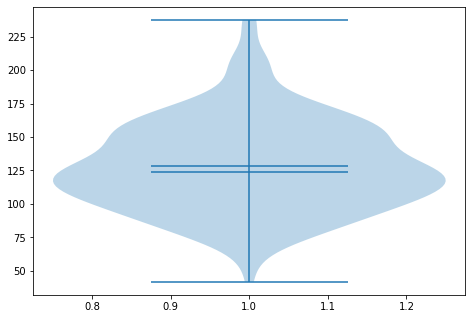

In [17]:
showViolinPlot(tempo["kassette"])

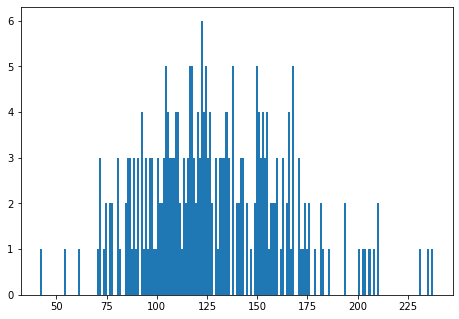

In [18]:
showHistogram(tempo["kassette"])

In [19]:
# CD

In [20]:
pd.DataFrame(tempo["cd"]).describe()

,0
count,249.000000
mean,127.431952
std,34.838973
min,0.000000
25%,104.171000
50%,124.577000
75%,146.010000
max,235.337000


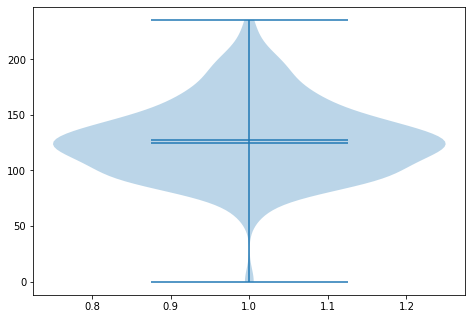

In [21]:
showViolinPlot(tempo["cd"])

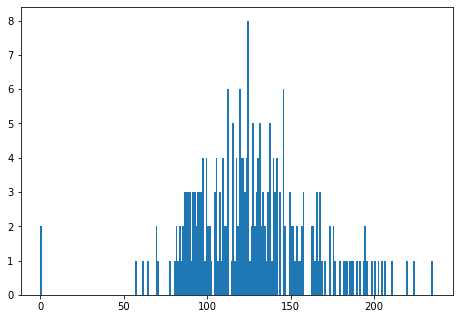

In [22]:
showHistogram(tempo["cd"])

In [23]:
# MP3

In [24]:
pd.DataFrame(tempo["mp3"]).describe()

,0
count,2706.000000
mean,125.616985
std,36.248534
min,0.000000
25%,97.888500
50%,122.228500
75%,147.817750
max,258.677000


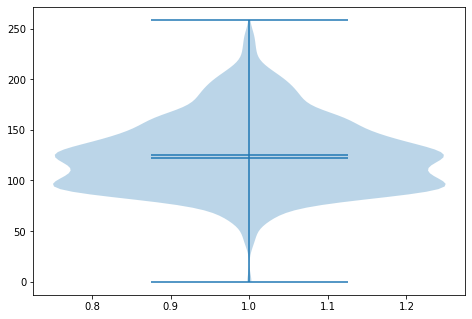

In [25]:
showViolinPlot(tempo["mp3"])

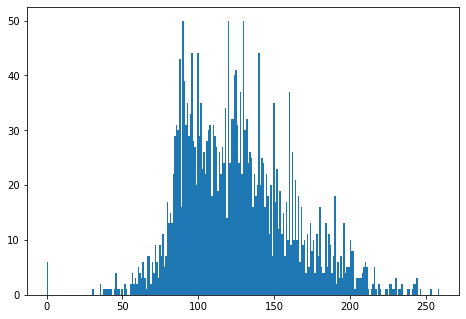

In [26]:
showHistogram(tempo["mp3"])